In [3]:
#Load Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adagrad, Adam
import warnings
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [6]:
#matplotlib inline
dataset=pd.read_csv('./heart.csv')
dataset.head(8)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


In [7]:
#Creating Dummy Variables
chest_pain=pd.get_dummies(dataset['cp'],prefix='cp',drop_first=True)
dataset=pd.concat([dataset,chest_pain],axis=1)
dataset.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(dataset['slope'],prefix='slope')
th=pd.get_dummies(dataset['thal'],prefix='thal')
rest_ecg=pd.get_dummies(dataset['restecg'],prefix='restecg')
frames=[dataset,sp,th,rest_ecg]
dataset=pd.concat(frames,axis=1)
dataset.drop(['slope','thal','restecg'],axis=1,inplace=True)
dataset.head(8)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,1,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,0,1,0
5,57,1,140,192,0,148,0,0.4,0,1,...,0,1,0,0,1,0,0,0,1,0
6,56,0,140,294,0,153,0,1.3,0,1,...,0,1,0,0,0,1,0,1,0,0
7,44,1,120,263,0,173,0,0.0,0,1,...,0,0,1,0,0,0,1,0,1,0


In [10]:
#Defining trainingset
X = dataset.drop(['target'], axis = 1)
y = dataset.target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
conclusion = []

#adam = optimizers.adam(lr=0.003)
optimizers_list = [[Adagrad,0.01,0.02,0.03], [SGD,0.01,0.02,0.03], [Adam,0.001,0.002,0.003]]


Train on 169 samples, validate on 73 samples
Epoch 1/100
169/169 [==============================] - 1s 5ms/sample - loss: 0.6796 - accuracy: 0.5562 - val_loss: 0.6995 - val_accuracy: 0.4795
Epoch 2/100
169/169 [==============================] - 0s 177us/sample - loss: 0.6702 - accuracy: 0.5740 - val_loss: 0.6897 - val_accuracy: 0.4795
Epoch 3/100
169/169 [==============================] - 0s 177us/sample - loss: 0.6618 - accuracy: 0.5858 - val_loss: 0.6811 - val_accuracy: 0.4932
Epoch 4/100
169/169 [==============================] - 0s 171us/sample - loss: 0.6536 - accuracy: 0.5976 - val_loss: 0.6724 - val_accuracy: 0.5479
Epoch 5/100
169/169 [==============================] - 0s 171us/sample - loss: 0.6456 - accuracy: 0.6036 - val_loss: 0.6650 - val_accuracy: 0.5616
Epoch 6/100
169/169 [==============================] - 0s 195us/sample - loss: 0.6388 - accuracy: 0.6154 - val_loss: 0.6584 - val_accuracy: 0.5753
Epoch 7/100
169/169 [==============================] - 0s 195us/sample - lo

169/169 [==============================] - 0s 177us/sample - loss: 0.4358 - accuracy: 0.8580 - val_loss: 0.4934 - val_accuracy: 0.7397
Epoch 57/100
169/169 [==============================] - 0s 171us/sample - loss: 0.4334 - accuracy: 0.8580 - val_loss: 0.4917 - val_accuracy: 0.7397
Epoch 58/100
169/169 [==============================] - 0s 177us/sample - loss: 0.4313 - accuracy: 0.8580 - val_loss: 0.4897 - val_accuracy: 0.7397
Epoch 59/100
169/169 [==============================] - 0s 171us/sample - loss: 0.4291 - accuracy: 0.8521 - val_loss: 0.4882 - val_accuracy: 0.7397
Epoch 60/100
169/169 [==============================] - 0s 165us/sample - loss: 0.4269 - accuracy: 0.8580 - val_loss: 0.4866 - val_accuracy: 0.7397
Epoch 61/100
169/169 [==============================] - 0s 171us/sample - loss: 0.4250 - accuracy: 0.8580 - val_loss: 0.4851 - val_accuracy: 0.7397
Epoch 62/100
169/169 [==============================] - 0s 165us/sample - loss: 0.4231 - accuracy: 0.8580 - val_loss: 0.4837 

169/169 [==============================] - 0s 183us/sample - loss: 0.5556 - accuracy: 0.7988 - val_loss: 0.5658 - val_accuracy: 0.7534
Epoch 12/100
169/169 [==============================] - 0s 195us/sample - loss: 0.5427 - accuracy: 0.7929 - val_loss: 0.5553 - val_accuracy: 0.7534
Epoch 13/100
169/169 [==============================] - 0s 195us/sample - loss: 0.5314 - accuracy: 0.7988 - val_loss: 0.5452 - val_accuracy: 0.7397
Epoch 14/100
169/169 [==============================] - 0s 195us/sample - loss: 0.5210 - accuracy: 0.8107 - val_loss: 0.5347 - val_accuracy: 0.7534
Epoch 15/100
169/169 [==============================] - 0s 165us/sample - loss: 0.5091 - accuracy: 0.8047 - val_loss: 0.5263 - val_accuracy: 0.7534
Epoch 16/100
169/169 [==============================] - 0s 166us/sample - loss: 0.4988 - accuracy: 0.8166 - val_loss: 0.5191 - val_accuracy: 0.7534
Epoch 17/100
169/169 [==============================] - 0s 171us/sample - loss: 0.4898 - accuracy: 0.8166 - val_loss: 0.5113 

169/169 [==============================] - 0s 183us/sample - loss: 0.3013 - accuracy: 0.8817 - val_loss: 0.4050 - val_accuracy: 0.8219
Epoch 67/100
169/169 [==============================] - 0s 301us/sample - loss: 0.2995 - accuracy: 0.8817 - val_loss: 0.4056 - val_accuracy: 0.8219
Epoch 68/100
169/169 [==============================] - 0s 201us/sample - loss: 0.2987 - accuracy: 0.8817 - val_loss: 0.4054 - val_accuracy: 0.8082
Epoch 69/100
169/169 [==============================] - 0s 230us/sample - loss: 0.2975 - accuracy: 0.8817 - val_loss: 0.4049 - val_accuracy: 0.8219
Epoch 70/100
169/169 [==============================] - 0s 218us/sample - loss: 0.2961 - accuracy: 0.8817 - val_loss: 0.4050 - val_accuracy: 0.8219
Epoch 71/100
169/169 [==============================] - 0s 183us/sample - loss: 0.2949 - accuracy: 0.8817 - val_loss: 0.4045 - val_accuracy: 0.8219
Epoch 72/100
169/169 [==============================] - 0s 189us/sample - loss: 0.2932 - accuracy: 0.8817 - val_loss: 0.4045 

169/169 [==============================] - 0s 183us/sample - loss: 0.3461 - accuracy: 0.8462 - val_loss: 0.4189 - val_accuracy: 0.8082
Epoch 22/100
169/169 [==============================] - 0s 171us/sample - loss: 0.3417 - accuracy: 0.8521 - val_loss: 0.4185 - val_accuracy: 0.8082
Epoch 23/100
169/169 [==============================] - 0s 177us/sample - loss: 0.3380 - accuracy: 0.8521 - val_loss: 0.4168 - val_accuracy: 0.8082
Epoch 24/100
169/169 [==============================] - 0s 171us/sample - loss: 0.3338 - accuracy: 0.8580 - val_loss: 0.4155 - val_accuracy: 0.8082
Epoch 25/100
169/169 [==============================] - 0s 171us/sample - loss: 0.3304 - accuracy: 0.8521 - val_loss: 0.4149 - val_accuracy: 0.8082
Epoch 26/100
169/169 [==============================] - 0s 166us/sample - loss: 0.3267 - accuracy: 0.8698 - val_loss: 0.4130 - val_accuracy: 0.8082
Epoch 27/100
169/169 [==============================] - 0s 177us/sample - loss: 0.3238 - accuracy: 0.8698 - val_loss: 0.4117 

169/169 [==============================] - 0s 177us/sample - loss: 0.2488 - accuracy: 0.9053 - val_loss: 0.4398 - val_accuracy: 0.8219
Epoch 77/100
169/169 [==============================] - 0s 183us/sample - loss: 0.2475 - accuracy: 0.9053 - val_loss: 0.4415 - val_accuracy: 0.8219
Epoch 78/100
169/169 [==============================] - 0s 171us/sample - loss: 0.2462 - accuracy: 0.9053 - val_loss: 0.4421 - val_accuracy: 0.8082
Epoch 79/100
169/169 [==============================] - 0s 165us/sample - loss: 0.2452 - accuracy: 0.9053 - val_loss: 0.4434 - val_accuracy: 0.8082
Epoch 80/100
169/169 [==============================] - 0s 195us/sample - loss: 0.2438 - accuracy: 0.9053 - val_loss: 0.4446 - val_accuracy: 0.8082
Epoch 81/100
169/169 [==============================] - 0s 177us/sample - loss: 0.2429 - accuracy: 0.9053 - val_loss: 0.4457 - val_accuracy: 0.8082
Epoch 82/100
169/169 [==============================] - 0s 159us/sample - loss: 0.2412 - accuracy: 0.9053 - val_loss: 0.4454 

169/169 [==============================] - 0s 177us/sample - loss: 0.5434 - accuracy: 0.7633 - val_loss: 0.5211 - val_accuracy: 0.7945
Epoch 32/100
169/169 [==============================] - 0s 171us/sample - loss: 0.5410 - accuracy: 0.7633 - val_loss: 0.5191 - val_accuracy: 0.7945
Epoch 33/100
169/169 [==============================] - 0s 171us/sample - loss: 0.5389 - accuracy: 0.7633 - val_loss: 0.5175 - val_accuracy: 0.7945
Epoch 34/100
169/169 [==============================] - 0s 195us/sample - loss: 0.5363 - accuracy: 0.7574 - val_loss: 0.5148 - val_accuracy: 0.7945
Epoch 35/100
169/169 [==============================] - 0s 195us/sample - loss: 0.5340 - accuracy: 0.7633 - val_loss: 0.5130 - val_accuracy: 0.7945
Epoch 36/100
169/169 [==============================] - 0s 201us/sample - loss: 0.5318 - accuracy: 0.7633 - val_loss: 0.5110 - val_accuracy: 0.7945
Epoch 37/100
169/169 [==============================] - 0s 307us/sample - loss: 0.5299 - accuracy: 0.7692 - val_loss: 0.5088 

169/169 [==============================] - 0s 177us/sample - loss: 0.4348 - accuracy: 0.8047 - val_loss: 0.4285 - val_accuracy: 0.8356
Epoch 87/100
169/169 [==============================] - 0s 177us/sample - loss: 0.4335 - accuracy: 0.8107 - val_loss: 0.4273 - val_accuracy: 0.8356
Epoch 88/100
169/169 [==============================] - 0s 171us/sample - loss: 0.4318 - accuracy: 0.8107 - val_loss: 0.4261 - val_accuracy: 0.8356
Epoch 89/100
169/169 [==============================] - 0s 165us/sample - loss: 0.4304 - accuracy: 0.8107 - val_loss: 0.4248 - val_accuracy: 0.8356
Epoch 90/100
169/169 [==============================] - 0s 177us/sample - loss: 0.4290 - accuracy: 0.8166 - val_loss: 0.4238 - val_accuracy: 0.8356
Epoch 91/100
169/169 [==============================] - 0s 176us/sample - loss: 0.4278 - accuracy: 0.8166 - val_loss: 0.4227 - val_accuracy: 0.8493
Epoch 92/100
169/169 [==============================] - 0s 159us/sample - loss: 0.4263 - accuracy: 0.8166 - val_loss: 0.4219 

169/169 [==============================] - 0s 171us/sample - loss: 0.4649 - accuracy: 0.7574 - val_loss: 0.4772 - val_accuracy: 0.8082
Epoch 42/100
169/169 [==============================] - 0s 165us/sample - loss: 0.4616 - accuracy: 0.7574 - val_loss: 0.4751 - val_accuracy: 0.8082
Epoch 43/100
169/169 [==============================] - 0s 171us/sample - loss: 0.4586 - accuracy: 0.7633 - val_loss: 0.4729 - val_accuracy: 0.8082
Epoch 44/100
169/169 [==============================] - 0s 189us/sample - loss: 0.4561 - accuracy: 0.7633 - val_loss: 0.4709 - val_accuracy: 0.8082
Epoch 45/100
169/169 [==============================] - 0s 171us/sample - loss: 0.4532 - accuracy: 0.7692 - val_loss: 0.4686 - val_accuracy: 0.8082
Epoch 46/100
169/169 [==============================] - 0s 159us/sample - loss: 0.4505 - accuracy: 0.7692 - val_loss: 0.4664 - val_accuracy: 0.8082
Epoch 47/100
169/169 [==============================] - 0s 171us/sample - loss: 0.4480 - accuracy: 0.7692 - val_loss: 0.4641 

169/169 [==============================] - 0s 189us/sample - loss: 0.3671 - accuracy: 0.8402 - val_loss: 0.4138 - val_accuracy: 0.8356
Epoch 97/100
169/169 [==============================] - 0s 177us/sample - loss: 0.3661 - accuracy: 0.8402 - val_loss: 0.4138 - val_accuracy: 0.8356
Epoch 98/100
169/169 [==============================] - 0s 177us/sample - loss: 0.3654 - accuracy: 0.8402 - val_loss: 0.4127 - val_accuracy: 0.8356
Epoch 99/100
169/169 [==============================] - 0s 201us/sample - loss: 0.3644 - accuracy: 0.8343 - val_loss: 0.4125 - val_accuracy: 0.8356
Epoch 100/100
169/169 [==============================] - 0s 177us/sample - loss: 0.3632 - accuracy: 0.8343 - val_loss: 0.4121 - val_accuracy: 0.8356
Train on 169 samples, validate on 73 samples
Epoch 1/100
169/169 [==============================] - 1s 4ms/sample - loss: 0.9616 - accuracy: 0.4556 - val_loss: 0.9042 - val_accuracy: 0.4384
Epoch 2/100
169/169 [==============================] - 0s 165us/sample - loss: 0.8

169/169 [==============================] - 0s 271us/sample - loss: 0.4129 - accuracy: 0.8402 - val_loss: 0.5018 - val_accuracy: 0.7808
Epoch 52/100
169/169 [==============================] - 0s 218us/sample - loss: 0.4091 - accuracy: 0.8343 - val_loss: 0.5007 - val_accuracy: 0.7808
Epoch 53/100
169/169 [==============================] - 0s 378us/sample - loss: 0.4056 - accuracy: 0.8402 - val_loss: 0.4996 - val_accuracy: 0.7808
Epoch 54/100
169/169 [==============================] - 0s 207us/sample - loss: 0.4024 - accuracy: 0.8402 - val_loss: 0.4986 - val_accuracy: 0.7808
Epoch 55/100
169/169 [==============================] - 0s 218us/sample - loss: 0.3996 - accuracy: 0.8343 - val_loss: 0.4969 - val_accuracy: 0.7808
Epoch 56/100
169/169 [==============================] - 0s 201us/sample - loss: 0.3966 - accuracy: 0.8343 - val_loss: 0.4965 - val_accuracy: 0.7808
Epoch 57/100
169/169 [==============================] - 0s 195us/sample - loss: 0.3941 - accuracy: 0.8343 - val_loss: 0.4954 

Epoch 6/100
169/169 [==============================] - 0s 177us/sample - loss: 0.6829 - accuracy: 0.5621 - val_loss: 0.6732 - val_accuracy: 0.5616
Epoch 7/100
169/169 [==============================] - 0s 189us/sample - loss: 0.6741 - accuracy: 0.5740 - val_loss: 0.6634 - val_accuracy: 0.5890
Epoch 8/100
169/169 [==============================] - 0s 171us/sample - loss: 0.6649 - accuracy: 0.5917 - val_loss: 0.6544 - val_accuracy: 0.6027
Epoch 9/100
169/169 [==============================] - ETA: 0s - loss: 0.6663 - accuracy: 0.58 - 0s 189us/sample - loss: 0.6571 - accuracy: 0.6272 - val_loss: 0.6460 - val_accuracy: 0.6301
Epoch 10/100
169/169 [==============================] - 0s 173us/sample - loss: 0.6488 - accuracy: 0.6568 - val_loss: 0.6380 - val_accuracy: 0.6438
Epoch 11/100
169/169 [==============================] - 0s 193us/sample - loss: 0.6405 - accuracy: 0.6686 - val_loss: 0.6302 - val_accuracy: 0.6575
Epoch 12/100
169/169 [==============================] - 0s 183us/sample - 

169/169 [==============================] - 0s 165us/sample - loss: 0.3328 - accuracy: 0.8757 - val_loss: 0.3787 - val_accuracy: 0.7945
Epoch 62/100
169/169 [==============================] - 0s 183us/sample - loss: 0.3303 - accuracy: 0.8817 - val_loss: 0.3775 - val_accuracy: 0.7945
Epoch 63/100
169/169 [==============================] - 0s 171us/sample - loss: 0.3280 - accuracy: 0.8876 - val_loss: 0.3762 - val_accuracy: 0.7945
Epoch 64/100
169/169 [==============================] - 0s 183us/sample - loss: 0.3257 - accuracy: 0.8876 - val_loss: 0.3749 - val_accuracy: 0.7945
Epoch 65/100
169/169 [==============================] - 0s 177us/sample - loss: 0.3237 - accuracy: 0.8876 - val_loss: 0.3738 - val_accuracy: 0.8082
Epoch 66/100
169/169 [==============================] - 0s 177us/sample - loss: 0.3213 - accuracy: 0.8876 - val_loss: 0.3725 - val_accuracy: 0.8082
Epoch 67/100
169/169 [==============================] - 0s 171us/sample - loss: 0.3193 - accuracy: 0.8935 - val_loss: 0.3713 

169/169 [==============================] - 0s 183us/sample - loss: 0.4675 - accuracy: 0.8225 - val_loss: 0.5180 - val_accuracy: 0.8082
Epoch 17/100
169/169 [==============================] - 0s 183us/sample - loss: 0.4540 - accuracy: 0.8343 - val_loss: 0.5062 - val_accuracy: 0.8082
Epoch 18/100
169/169 [==============================] - 0s 183us/sample - loss: 0.4394 - accuracy: 0.8343 - val_loss: 0.4952 - val_accuracy: 0.7945
Epoch 19/100
169/169 [==============================] - 0s 213us/sample - loss: 0.4279 - accuracy: 0.8343 - val_loss: 0.4849 - val_accuracy: 0.8082
Epoch 20/100
169/169 [==============================] - 0s 195us/sample - loss: 0.4151 - accuracy: 0.8402 - val_loss: 0.4765 - val_accuracy: 0.8082
Epoch 21/100
169/169 [==============================] - 0s 195us/sample - loss: 0.4050 - accuracy: 0.8580 - val_loss: 0.4689 - val_accuracy: 0.8082
Epoch 22/100
169/169 [==============================] - 0s 336us/sample - loss: 0.3959 - accuracy: 0.8521 - val_loss: 0.4620 

169/169 [==============================] - 0s 183us/sample - loss: 0.2218 - accuracy: 0.9290 - val_loss: 0.3846 - val_accuracy: 0.8219
Epoch 72/100
169/169 [==============================] - 0s 183us/sample - loss: 0.2190 - accuracy: 0.9290 - val_loss: 0.3857 - val_accuracy: 0.8219
Epoch 73/100
169/169 [==============================] - 0s 189us/sample - loss: 0.2168 - accuracy: 0.9290 - val_loss: 0.3865 - val_accuracy: 0.8219
Epoch 74/100
169/169 [==============================] - 0s 183us/sample - loss: 0.2136 - accuracy: 0.9231 - val_loss: 0.3878 - val_accuracy: 0.8219
Epoch 75/100
169/169 [==============================] - 0s 180us/sample - loss: 0.2107 - accuracy: 0.9349 - val_loss: 0.3894 - val_accuracy: 0.8356
Epoch 76/100
169/169 [==============================] - 0s 171us/sample - loss: 0.2080 - accuracy: 0.9349 - val_loss: 0.3904 - val_accuracy: 0.8356
Epoch 77/100
169/169 [==============================] - 0s 171us/sample - loss: 0.2061 - accuracy: 0.9349 - val_loss: 0.3914 

169/169 [==============================] - 0s 207us/sample - loss: 0.3190 - accuracy: 0.8876 - val_loss: 0.3708 - val_accuracy: 0.8082
Epoch 27/100
169/169 [==============================] - 0s 201us/sample - loss: 0.3122 - accuracy: 0.8935 - val_loss: 0.3688 - val_accuracy: 0.8082
Epoch 28/100
169/169 [==============================] - 0s 207us/sample - loss: 0.3060 - accuracy: 0.8935 - val_loss: 0.3676 - val_accuracy: 0.8082
Epoch 29/100
169/169 [==============================] - 0s 201us/sample - loss: 0.3005 - accuracy: 0.8994 - val_loss: 0.3666 - val_accuracy: 0.8082
Epoch 30/100
169/169 [==============================] - 0s 201us/sample - loss: 0.2955 - accuracy: 0.8994 - val_loss: 0.3659 - val_accuracy: 0.7945
Epoch 31/100
169/169 [==============================] - 0s 212us/sample - loss: 0.2906 - accuracy: 0.8994 - val_loss: 0.3651 - val_accuracy: 0.8082
Epoch 32/100
169/169 [==============================] - 0s 189us/sample - loss: 0.2858 - accuracy: 0.8994 - val_loss: 0.3642 

169/169 [==============================] - 0s 201us/sample - loss: 0.1562 - accuracy: 0.9467 - val_loss: 0.3929 - val_accuracy: 0.8082
Epoch 82/100
169/169 [==============================] - 0s 195us/sample - loss: 0.1539 - accuracy: 0.9467 - val_loss: 0.3944 - val_accuracy: 0.8082
Epoch 83/100
169/169 [==============================] - 0s 230us/sample - loss: 0.1518 - accuracy: 0.9467 - val_loss: 0.3964 - val_accuracy: 0.8082
Epoch 84/100
169/169 [==============================] - 0s 195us/sample - loss: 0.1495 - accuracy: 0.9527 - val_loss: 0.3978 - val_accuracy: 0.8082
Epoch 85/100
169/169 [==============================] - 0s 360us/sample - loss: 0.1473 - accuracy: 0.9527 - val_loss: 0.4002 - val_accuracy: 0.8082
Epoch 86/100
169/169 [==============================] - 0s 212us/sample - loss: 0.1453 - accuracy: 0.9527 - val_loss: 0.4022 - val_accuracy: 0.8082
Epoch 87/100
169/169 [==============================] - 0s 207us/sample - loss: 0.1434 - accuracy: 0.9527 - val_loss: 0.4041 

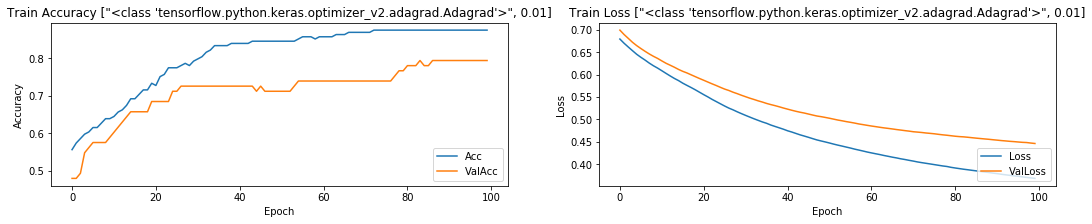

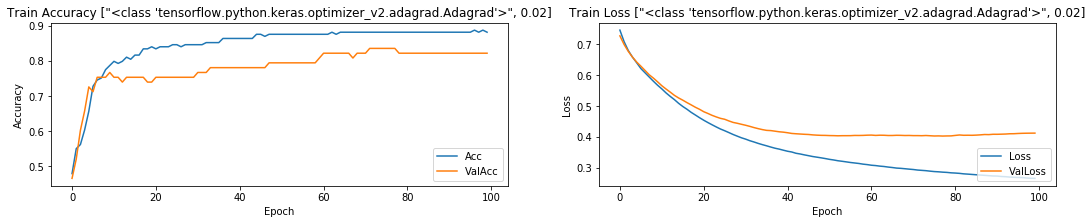

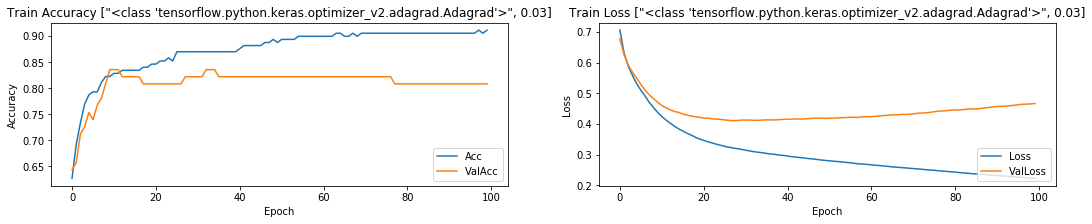

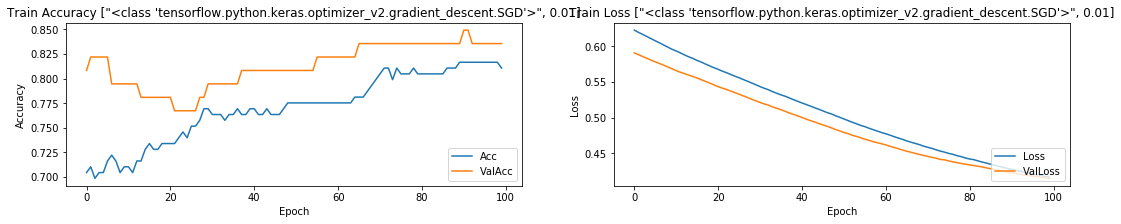

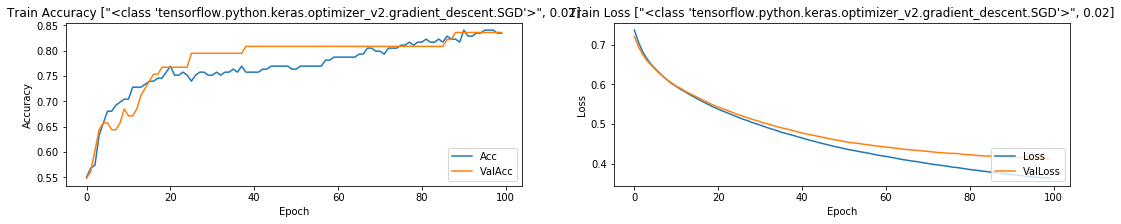

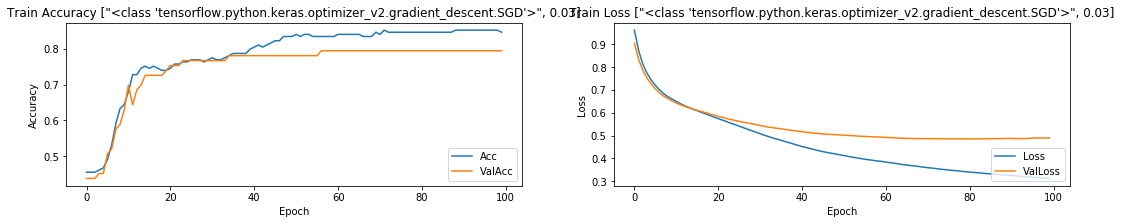

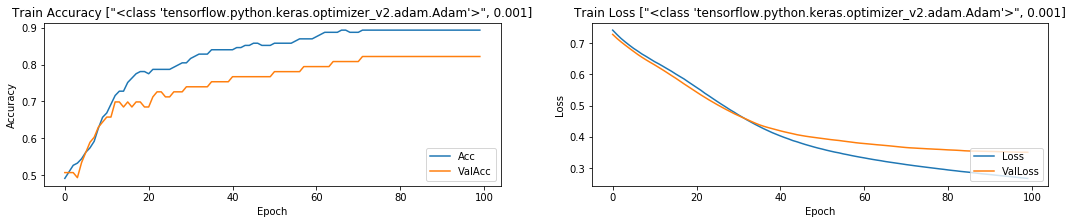

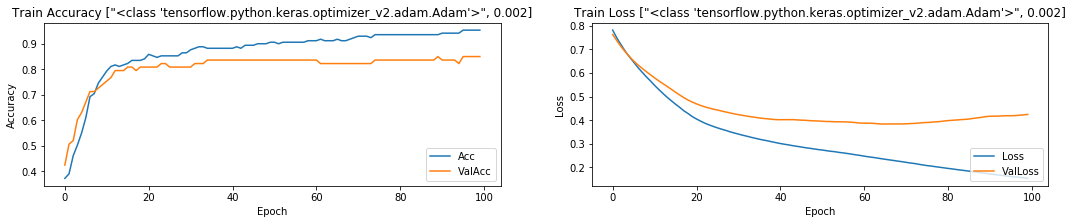

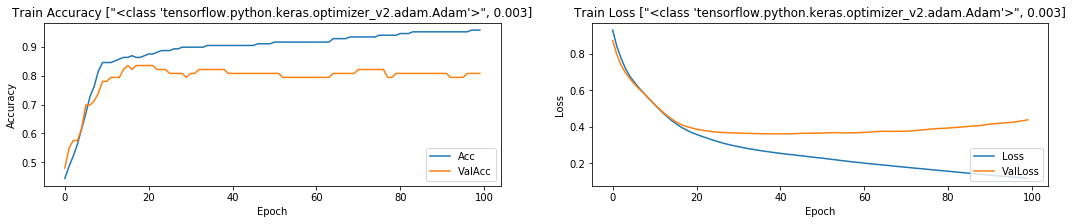

In [15]:
for i in range (len(optimizers_list)):
	a=[]
	for j in range (1,(len(optimizers_list[i]))):
		# Compiling the ANN
		classifier = Sequential()
        
		# Adding the input layer and the first hidden layer
		classifier.add(Dense(11, activation = 'relu', input_shape = (22,)))
        
		# Adding the second hidden layer
		classifier.add(Dense(11, activation = 'relu'))
        
		# Adding the output layer
		classifier.add(Dense(1, activation = 'sigmoid'))
		
		x = optimizers_list[i][0](lr=optimizers_list[i][j])
		classifier.compile(optimizer = x, loss = 'binary_crossentropy', metrics = ['accuracy'])
		start = time.time()
		test = classifier.fit(X_train, y_train, batch_size = 50, epochs = 100,validation_split=0.30)
		
		e=[str(optimizers_list[i][0]),optimizers_list[i][j]]
		fig, ax = plt.subplots(1,2,figsize=(18,3))
		ax[0].plot(test.history['accuracy'])
		ax[0].plot(test.history['val_accuracy'])
		ax[0].set_title('Train Accuracy %s'%e)
		ax[0].set_ylabel('Accuracy')
		ax[0].set_xlabel('Epoch')
		ax[0].legend(['Acc', 'ValAcc'], loc='lower right')

		ax[1].plot(test.history['loss'])
		ax[1].plot(test.history['val_loss'])
		ax[1].set_title('Train Loss %s'%e)
		ax[1].set_ylabel('Loss')
		ax[1].set_xlabel('Epoch')
		ax[1].legend(['Loss', 'ValLoss'], loc='lower right')
		a.append(e)
		a.append(time.time() - start)

		y_pred = classifier.predict(X_test)
		
		ac=accuracy_score(y_test, y_pred.round())
		#print(i,j,'accuracy of the model: ',ac)
		
		a.append(ac)
	conclusion.append(a)
print(conclusion)
